# PUBG绝地求生单排的获胜因素和获胜策略

数据来源：kaggle（PUBG官方API爬取）https://www.kaggle.com/c/pubg-finish-placement-prediction/data

<p>PUBG是由蓝洞开发并发行的一款射击游戏，大逃杀玩法是其红极一时的主要原因。在该游戏中,玩家从飞机上空降落到地图上的不同位置，从建筑物中寻找随机分布的武器、弹药、护甲和医疗用品，并向不断缩小的安全区内转移（安全区外会不断掉血）。在此过程中玩家需要保存自己、消灭对手，直到留下最后一个团队。

<p>由于团队之间的配合作战很难通过数据表现，本部分基于初步处理过的单排比赛数据集（即matchType为solo）。

******

## 一、数据预处理

<p>原始数据集中共有704104条数据，24个维度。其中winPlacePerc是本课题的研究对象。

In [25]:
#导入数据
import pandas as pd
data = pd.read_csv(r'dataSolo_V2.csv')
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc',
       'totalDistance', 'headshot_rate', 'kill_rate', 'playersInGroup',
       'weaponsPerDistance', 'healsPerDistance', 'killsPerDistance',
       'distance_over_weapons', 'distance_over_heals', 'distance_over_kills',
       'healthitems', 'skill'],
      dtype='object')

### 1、清洗异常数据
- 检查playersInGroup队伍人数，单排应当为1

In [26]:
data['playersInGroup'].describe()

count    704104.000000
mean          1.083519
std           0.789455
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          64.000000
Name: playersInGroup, dtype: float64

In [27]:
data=data[data['playersInGroup']==1]
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,kill_rate,playersInGroup,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.00,0,103.00000,0.0,0.00,0,46.35,1.03,1.03,58.530,...,1.000000,1,0.040201,0.000000,0.020704,24.875000,0.000000,48.300971,0,1.03
1,0.00,0,8.87952,0.0,0.00,0,49.92,0.00,0.00,0.000,...,0.000000,1,0.001940,0.000000,0.000000,515.500000,0.000000,0.000000,0,0.00
2,0.00,1,333.92600,0.0,1.03,5,5.15,4.12,1.03,49.830,...,1.000000,1,0.001788,0.002439,0.002010,559.140000,670.968000,814.281553,6,2.06
3,0.00,3,264.47200,0.0,0.00,12,13.52,2.08,1.04,36.000,...,1.000000,1,0.000720,0.006715,0.001164,1389.763333,347.440833,2004.466346,15,1.04
4,0.00,0,142.37600,0.0,0.00,0,38.48,1.04,1.04,22.830,...,1.000000,1,0.003694,0.000000,0.003842,270.700000,0.000000,260.288462,0,1.04
5,0.00,1,108.00000,0.0,0.00,0,25.92,1.08,1.08,21.250,...,1.000000,1,0.001888,0.000000,0.000707,529.666667,0.000000,1471.296296,1,1.08
6,0.00,0,202.28000,0.0,1.04,1,19.76,2.08,1.04,29.080,...,1.000000,1,0.020113,0.004023,0.008367,49.720000,248.600000,119.519231,1,2.08
7,0.00,2,105.00000,0.0,1.05,2,30.45,1.05,1.05,21.860,...,1.000000,1,0.003113,0.001245,0.000654,321.200000,803.000000,1529.523810,4,2.10
8,0.00,0,17.98810,0.0,0.00,0,79.79,0.00,0.00,0.000,...,0.000000,1,0.004990,0.000000,0.000000,200.400000,0.000000,0.000000,0,0.00
9,0.00,1,110.00000,0.0,0.00,0,41.80,1.10,1.10,7.667,...,1.000000,1,0.017264,0.000000,0.004748,57.925000,0.000000,210.636364,1,1.10


- 检查revives救援队友人数，单排应为0

In [28]:
data['revives'].describe()

count    668253.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: revives, dtype: float64

- 检查DBNOs击倒但没死亡的数量，单排因为没有队友扶，击倒后必定死亡，一般不存在不死亡的情况

In [29]:
data['DBNOs'].describe()

count    668253.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DBNOs, dtype: float64

- 检查各列是否存在缺失值

In [30]:
data.isna().sum()

assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPlacePerc             0
totalDistance            0
headshot_rate            0
kill_rate                0
playersInGroup           0
weaponsPerDistance       0
healsPerDistance         0
killsPerDistance         0
distance_over_weapons    0
distance_over_heals      0
distance_over_kills      0
healthitems              0
skill                    0
dtype: int64

In [32]:
data.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPlacePerc',
       'totalDistance', 'headshot_rate', 'kill_rate', 'playersInGroup',
       'weaponsPerDistance', 'healsPerDistance', 'killsPerDistance',
       'distance_over_weapons', 'distance_over_heals', 'distance_over_kills',
       'healthitems', 'skill'],
      dtype='object')

### 2.删除无关维度

In [33]:
data=data.drop(columns=['playersInGroup','revives','DBNOs'])
data.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,...,headshot_rate,kill_rate,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.0,0,103.00000,0.00,0,46.35,1.03,1.03,58.53,1466.72,...,0.00,1.0,0.040201,0.000000,0.020704,24.875000,0.000000,48.300971,0,1.03
1,0.0,0,8.87952,0.00,0,49.92,0.00,0.00,0.00,2045.68,...,0.00,0.0,0.001940,0.000000,0.000000,515.500000,0.000000,0.000000,0,0.00
2,0.0,1,333.92600,1.03,5,5.15,4.12,1.03,49.83,1942.58,...,0.25,1.0,0.001788,0.002439,0.002010,559.140000,670.968000,814.281553,6,2.06
3,0.0,3,264.47200,0.00,12,13.52,2.08,1.04,36.00,1425.84,...,0.00,1.0,0.000720,0.006715,0.001164,1389.763333,347.440833,2004.466346,15,1.04
4,0.0,0,142.37600,0.00,0,38.48,1.04,1.04,22.83,1482.00,...,0.00,1.0,0.003694,0.000000,0.003842,270.700000,0.000000,260.288462,0,1.04


### 3.抽取样本
<p>抽样5万数据集另存

In [34]:
sampleSolo=data.sample(n=50000, replace=False, weights=None, random_state=None, axis=None).reset_index(drop=True)

In [35]:
sampleSolo.to_csv((r'sampleSolo_V2.csv'),index=False)
sampleSolo.head()

,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,...,headshot_rate,kill_rate,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
0,0.0,0,0.0000,0.0,0,76.32,0.00,0.00,0.00,1428.88,...,0.0,0.0,0.016575,0.000000,0.000000,60.333333,0.00,0.000000,0,0.00
1,0.0,0,208.0000,0.0,0,20.80,2.08,1.04,19.02,1446.64,...,0.0,1.0,0.014710,0.000000,0.030597,67.980000,0.00,32.682692,0,1.04
2,0.0,0,49.4802,0.0,5,61.20,0.00,0.00,0.00,1898.22,...,0.0,0.0,0.004041,0.005051,0.000000,247.475000,197.98,0.000000,5,0.00
3,0.0,0,0.0000,0.0,0,71.69,0.00,0.00,0.00,2095.06,...,0.0,0.0,0.005219,0.000000,0.000000,191.600000,0.00,0.000000,0,0.00
4,0.0,0,313.9080,0.0,0,11.11,3.03,2.02,192.20,1383.70,...,0.0,1.0,0.001837,0.000000,0.001855,544.333333,0.00,538.943894,0,2.02


##  二、预测模型

### 1. 8：2分割训练测试集并标准化

In [1]:
#导入数据集
import pandas as pd
data=pd.read_csv(r'sampleSolo_V2.csv')
#删除matchDuration
data=data.drop(columns='matchDuration')

In [2]:
#8：2分割训练测试集，标准化
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=data.drop(columns='winPlacePerc')
y=data['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

In [3]:
x_train.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'totalDistance', 'headshot_rate',
       'kill_rate', 'weaponsPerDistance', 'healsPerDistance',
       'killsPerDistance', 'distance_over_weapons', 'distance_over_heals',
       'distance_over_kills', 'healthitems', 'skill'],
      dtype='object')

In [4]:
x_train.shape

(40000, 27)

### 2.预测模型

- 神经网络

In [5]:
import keras
#27个变量x
model = keras.models.Sequential()#初始化一个神经网络模型
model.add(keras.layers.Dense(54, activation='relu',input_shape = (x_train.shape[-1],)))
model.add(keras.layers.Dense(108, activation='relu'))
model.add(keras.layers.Dense(216, activation='relu'))
# !网络的最后一层只有一个单元,没有激活,是一个线性层
# !这是标量回归（标量回归是预测单一连续值的回归）的典型设置
model.add(keras.layers.Dense(1))
# !编译网络用的是mse损失函数,即均方误差（MSE, mean squared error），测值与目标值之差的平方,这是回归问题常用的损失函数
# !平均绝对误差（MAE, mean absolute error），是预测值与目标值之差的绝对值
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(x_train_ss,y_train,validation_data=(x_test_ss, y_test),epochs=30)#对模型进行训练

Using TensorFlow backend.


Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 5s 120us/step - loss: 0.0122 - mae: 0.0734 - val_loss: 0.0063 - val_mae: 0.0600
Epoch 2/30
40000/40000 [==============================] - 5s 114us/step - loss: 0.0060 - mae: 0.0564 - val_loss: 0.0054 - val_mae: 0.0540
Epoch 3/30
40000/40000 [==============================] - 5s 136us/step - loss: 0.0055 - mae: 0.0537 - val_loss: 0.0053 - val_mae: 0.0521
Epoch 4/30
40000/40000 [==============================] - 4s 111us/step - loss: 0.0052 - mae: 0.0521 - val_loss: 0.0056 - val_mae: 0.0532
Epoch 5/30
40000/40000 [==============================] - 4s 106us/step - loss: 0.0051 - mae: 0.0514 - val_loss: 0.0049 - val_mae: 0.0501
Epoch 6/30
40000/40000 [==============================] - 4s 106us/step - loss: 0.0050 - mae: 0.0508 - val_loss: 0.0053 - val_mae: 0.0530
Epoch 7/30
40000/40000 [==============================] - 4s 108us/step - loss: 0.0049 - mae: 0.0504 - val_loss: 0.0056 - 

- 线性模型

In [6]:
# 分别使用线性和决策树模型进行预测
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train_ss,y_train)
y_lr_pre = lr.predict(x_test_ss)
print('线性_MAE：',mean_absolute_error(y_test,y_lr_pre))
print('线性_R方：',r2_score(y_test,y_lr_pre))
print('线性Coefficients: \n',lr.coef_)

线性_MAE： 0.06399445622598582
线性_R方： 0.9056565547425318
线性Coefficients: 
 [-1.22460564e-02  2.07940011e+10  1.07230271e-02 -1.87835935e+10
  2.73449120e+10 -3.35482369e-01 -6.20686273e-02 -1.62457224e+10
  1.58452750e-03  3.81376835e+09 -2.40380808e+09  8.26131493e+07
 -2.85365234e-03 -6.99196961e-04  2.86744336e+09  2.46287517e-02
 -5.33632780e+09 -5.44399212e-03 -1.33416521e-01 -6.79889571e-04
 -2.64384912e-03 -1.64372004e-02  1.76618082e-02 -6.89916746e-04
  2.97510396e-02 -4.18681529e+10  3.02740834e+10]


- 决策树模型

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_ss,y_train)
y_dt_pre = dt.predict(x_test_ss)
print('决策树_MAE：',mean_absolute_error(y_test,y_dt_pre))
print('决策树_R方：',r2_score(y_test,y_dt_pre))
print('决策树参数： \n',dt.feature_importances_)

决策树_MAE： 0.06818656175
决策树_R方： 0.8906243849047569
决策树参数： 
 [4.80478269e-04 1.09791232e-02 5.34981059e-03 8.09631886e-04
 6.00602607e-04 1.64795988e-01 1.88663616e-03 1.52173362e-03
 4.86455385e-03 1.08713534e-03 4.94682169e-05 7.27310292e-04
 1.44185938e-04 9.58384016e-05 7.50728335e-01 2.05039124e-03
 2.01215908e-02 2.14506247e-04 3.07174865e-04 4.02096545e-03
 1.82550738e-03 1.29109570e-02 3.63714032e-03 2.19853194e-03
 4.95364220e-03 1.62552860e-03 2.01323255e-03]


In [8]:
# 决策树调参
from sklearn.model_selection import GridSearchCV
parameters_dt = {'max_depth':[10,11,12,13,14,15,16,18,19,20,21],'max_features':[14,15,16,17,18,19,20,21]}#对参数进行调参
gs_dt = GridSearchCV(dt,parameters_dt,scoring='neg_mean_absolute_error')#以MAE作为评价标准
gs_dt.fit(x_train_ss,y_train)
print(gs_dt.best_params_)
print(gs_dt.best_estimator_)

gs_dt.best_estimator_.fit(x_train_ss,y_train)
y_dt_pre2 = gs_dt.best_estimator_.predict(x_test_ss)

print('决策树_MAE：',mean_absolute_error(y_test,y_dt_pre2))
print('决策树_R方：',r2_score(y_test,y_dt_pre2))
print('决策树参数： \n',gs_dt.best_estimator_.feature_importances_)

{'max_depth': 10, 'max_features': 20}
DecisionTreeRegressor(max_depth=10, max_features=20)
决策树_MAE： 0.053392832278910715
决策树_R方： 0.9312111647250199
决策树参数： 
 [2.76326127e-05 1.62424075e-02 4.26470018e-04 4.07064418e-05
 4.35091908e-05 1.58848831e-01 3.03739475e-04 2.90443129e-04
 5.48332115e-04 1.42999359e-04 0.00000000e+00 1.98769929e-04
 7.50965477e-05 1.92916580e-06 7.86473381e-01 5.24638240e-04
 1.99996310e-02 2.46203710e-05 1.33761460e-05 4.64885365e-04
 2.28890423e-04 1.11064763e-02 7.03679178e-04 8.43436045e-05
 2.40102512e-03 5.84066946e-04 2.00120316e-04]


- KNN模型

In [9]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train_ss,y_train)
y_knn_pre = knn.predict(x_test_ss)
print('KNN_MAE：',mean_absolute_error(y_test,y_knn_pre))
print('KNN_R方：',r2_score(y_test,y_knn_pre))

KNN_MAE： 0.060998701333333336
KNN_R方： 0.9133838957256154


- GBRT

In [10]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(x_train_ss,y_train)
y_pr=gbr_reg.predict(x_test_ss)

import matplotlib.pyplot as plt
%matplotlib inline
print('gbr_reg_MAE',mean_absolute_error(y_test,y_pr))
print('GBRT_R方：',r2_score(y_test,y_pr))
gbr_reg.feature_importances_

gbr_reg_MAE 0.051451539586860585
GBRT_R方： 0.9385309720745676


array([9.42682649e-06, 1.79368229e-02, 1.52460026e-05, 3.91582012e-06,
       2.39544909e-06, 1.65466203e-01, 1.87034865e-03, 3.62619964e-04,
       7.97977990e-06, 2.91566484e-04, 1.59695371e-05, 4.68127348e-04,
       1.90584345e-04, 0.00000000e+00, 7.54826391e-01, 9.51851111e-04,
       3.93905780e-02, 0.00000000e+00, 1.44180767e-03, 2.17673912e-04,
       1.23822790e-04, 1.14927720e-02, 6.93271777e-05, 1.33059891e-06,
       1.41052175e-03, 2.50492886e-03, 9.27788266e-04])

- Lasso模型

In [11]:
#Lasso
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

#构造不同的lambda值
Lambdas=np.logspace(-5,2,200)
#设置交叉验证的参数，使用均方误差评估
lasso_cv=LassoCV(alphas=Lambdas,normalize=True,cv=10,max_iter=10000)
lasso_cv.fit(x_train_ss,y_train)
 
#基于最佳lambda值建模
lasso=Lasso(alpha=lasso_cv.alpha_,normalize=True,max_iter=10000)
lasso.fit(x_train_ss,y_train)

y_pred_lasso = lasso.fit(x_train_ss, y_train).predict(x_test_ss)
r_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print('lasso_mae',mean_absolute_error(y_test,y_pred_lasso))
print('lasso_R方：',r_score_lasso)

Lasso(alpha=1e-05, max_iter=10000, normalize=True)
lasso_mae 0.06542533266091305
lasso_R方： 0.9023704838027254


## 三、原始聚类后预测

In [129]:
#导入数据
import pandas as pd
data = pd.read_csv(r'data_cluster_solo_V2.csv')
data= data.drop(columns='matchDuration')

### 1.查看各簇类

In [130]:
center=data.groupby('dbscan').mean()
center

,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,rideDistance,...,headshot_rate,kill_rate,weaponsPerDistance,healsPerDistance,killsPerDistance,distance_over_weapons,distance_over_heals,distance_over_kills,healthitems,skill
dbscan,,,,,,,,,,,,,,,,,,,,,
-1,0.154024,2.865854,346.386592,1.165366,4.048780,28.941098,3.174268,1.085732,81.029183,5792.086710,...,0.142369,0.739143,0.690409,0.008207,0.060436,2266.296256,2227.351598,2697.908153,6.914634,2.976098
0,0.061275,1.089663,125.187322,0.267271,1.024857,49.365033,0.987680,0.511344,22.045420,440.684373,...,0.118396,0.449291,0.015174,0.001100,0.002394,335.341952,451.186793,538.803934,2.114520,0.778615
1,0.023547,1.149057,106.017368,0.205302,1.437736,46.524717,0.828528,0.484604,21.719770,1405.251222,...,0.105443,0.437673,0.003271,0.001176,0.001240,611.955720,620.321891,827.958776,2.586792,0.689906
2,0.128349,2.720183,287.100750,0.469771,2.183486,17.836927,2.587294,1.105917,49.227445,3855.524097,...,0.116749,0.961271,0.001193,0.001532,0.002235,1155.983652,2303.772621,3029.105824,4.903670,2.624220
3,0.205455,3.733766,366.241856,0.742857,3.590909,18.738442,3.111688,0.933766,85.478844,2876.735065,...,0.186830,0.784027,0.001580,0.001937,0.001539,969.827296,1878.477870,1732.751660,7.324675,1.676623
4,0.019091,1.618182,137.013238,0.152727,1.909091,40.081818,1.165455,0.534182,27.279455,2490.190364,...,0.062771,0.506818,0.001823,0.001891,0.001015,880.090709,1201.547198,1416.178243,3.527273,0.686909


In [77]:
#导出聚类中心
center.to_csv(r'data_cluster_solo_V2_center.csv')

In [131]:
data['dbscan'].value_counts()

 0    48961
 1      530
 2      218
 3      154
-1       82
 4       55
Name: dbscan, dtype: int64

In [132]:
# 按照label划分数据集
outlier,data1,data2,data3,data4,data5 = data.groupby('dbscan')
print("簇类数据集的标签：",outlier,data1[0],data2[0],data3[0],data4[0],data5[0])

簇类数据集的标签： (-1,        assists  boosts  damageDealt  headshotKills  heals  killPlace  kills  \
532       0.00       2     382.3360           1.03     10      10.30   3.09   
612       0.00       2     103.1940           0.00      0      28.35   1.05   
636       0.00       0     101.5040           0.00      0      34.32   1.04   
1161      0.00       3     155.9580           0.00      0      27.54   1.02   
1191      0.00       0     406.0160           0.00      0      13.52   3.12   
1367      0.00       0     266.5640           2.06      5      20.60   2.06   
1730      0.00       4    1159.7800          10.30      0       1.03  12.36   
2294      0.00      10    1827.0900           4.04      1       1.01  16.16   
2363      0.00       3     253.4460           0.00      2      20.14   2.12   
4127      0.00       0      73.1300           0.00     31      48.41   0.00   
4456      3.21       8     768.4740           1.07     13       1.07   7.49   
5593      0.00       2     314.3660  

### 2.簇类的winPlacePerc分布

- outlier

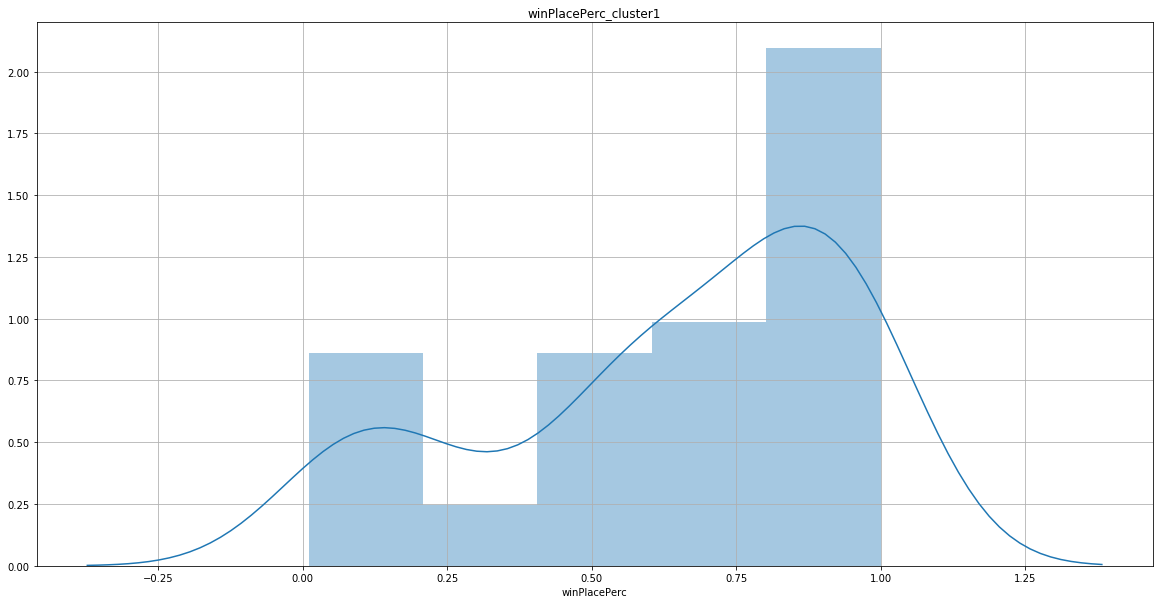

In [94]:
plt.figure(figsize=(20,10))
sns.distplot(outlier[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

- 簇类1

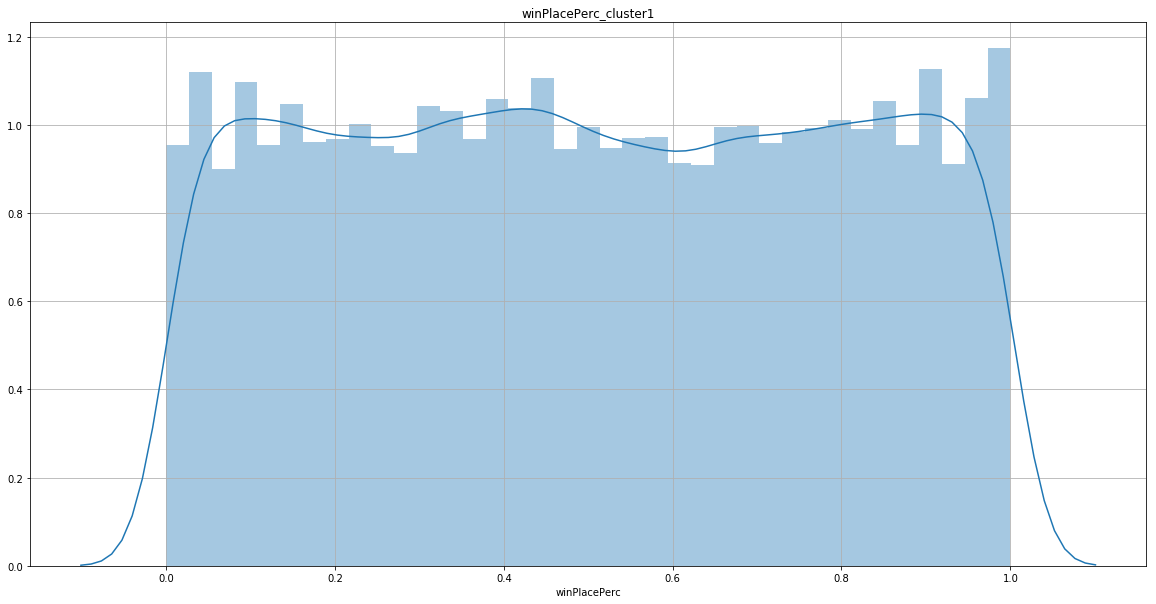

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
# 簇类1的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data1[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

- 簇类2

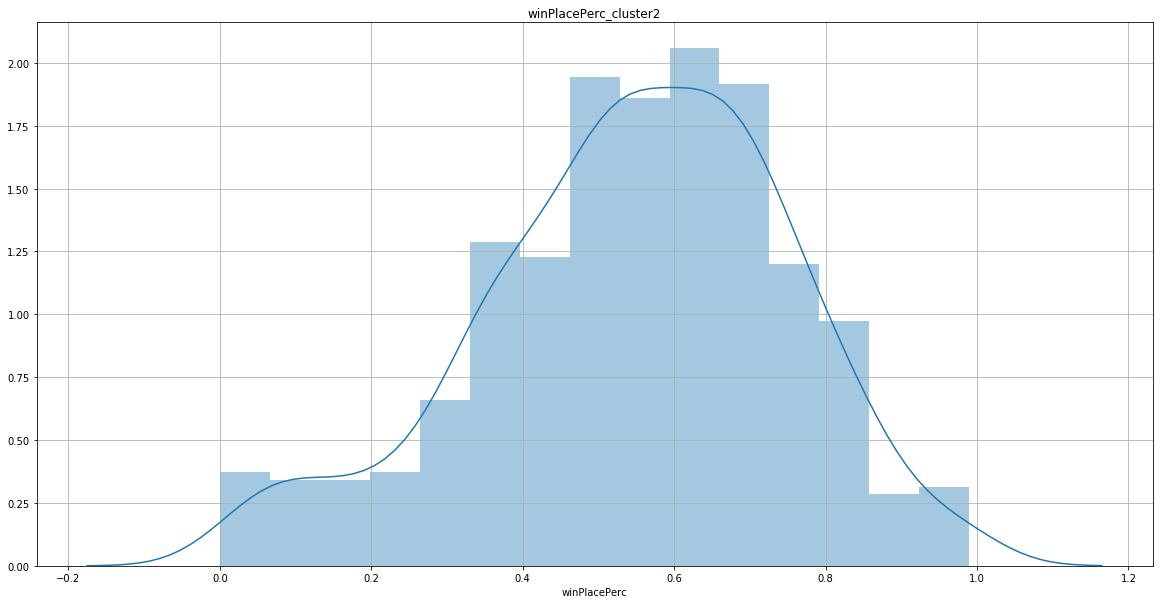

In [81]:
# 簇类2的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data2[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster2')
plt.grid()
plt.show()

- 簇类3

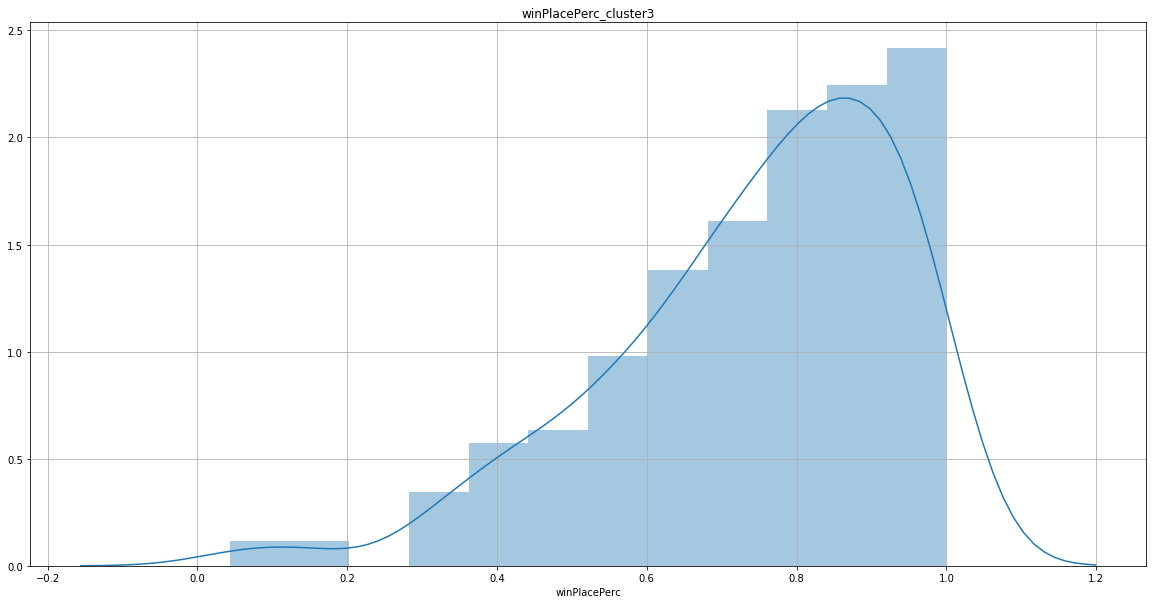

In [82]:
# 簇类3的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster3')
plt.grid()
plt.show()

- 簇类4

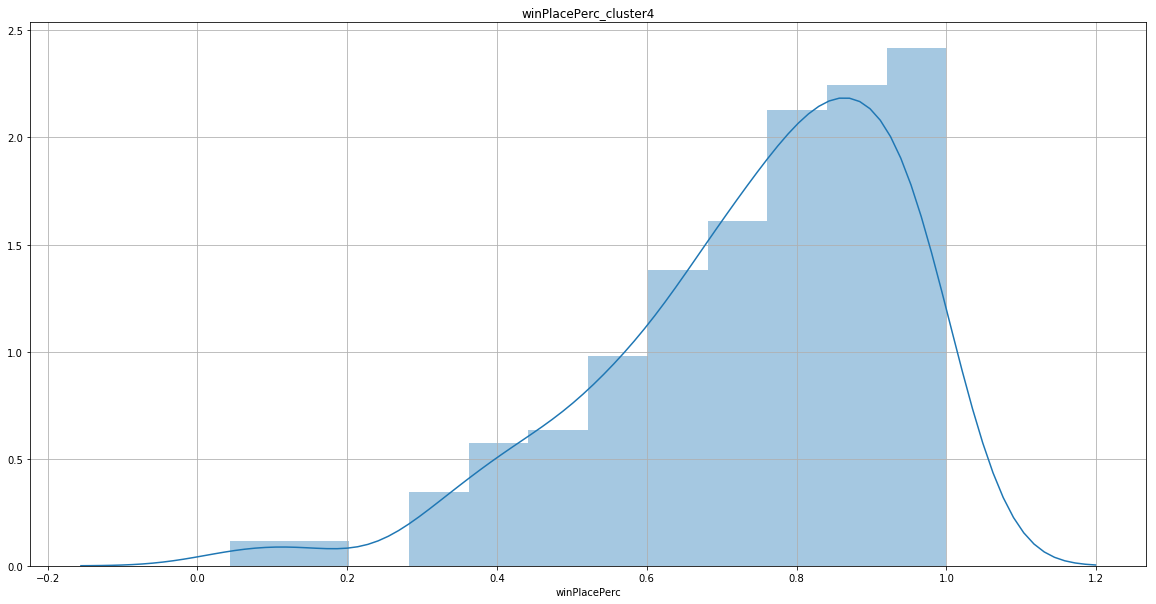

In [83]:
# 簇类4的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster4')
plt.grid()
plt.show()

- 簇类5

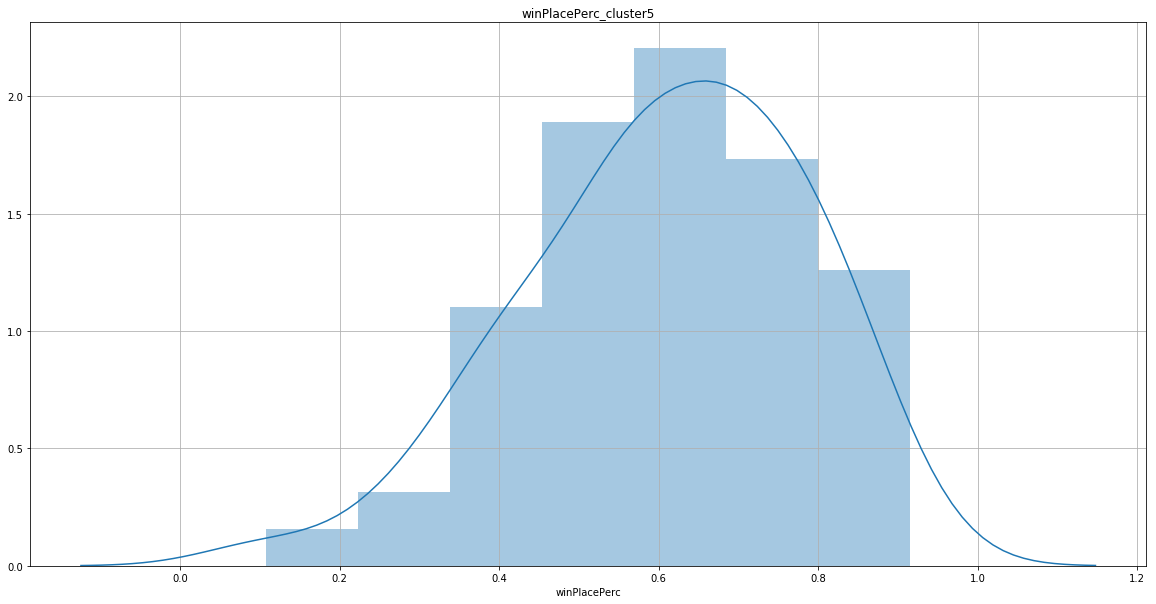

In [84]:
# 簇类5的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data5[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster5')
plt.grid()
plt.show()

### 3.数据集处理

In [133]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train0,test0 = train_test_split(outlier[1],test_size=0.2,random_state=10)
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)
train4,test4 = train_test_split(data4[1],test_size=0.2,random_state=10)
train5,test5 = train_test_split(data5[1],test_size=0.2,random_state=10)

In [134]:
train0_x = train0.drop(columns = ['winPlacePerc','dbscan'])
train0_y = train0['winPlacePerc']
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']
train4_x = train4.drop(columns = ['winPlacePerc','dbscan'])
train4_y = train4['winPlacePerc']
train5_x = train5.drop(columns = ['winPlacePerc','dbscan'])
train5_y = train5['winPlacePerc']

test0_x = test0.drop(columns = ['winPlacePerc','dbscan'])
test0_y = test0['winPlacePerc']
test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']
test4_x = test4.drop(columns = ['winPlacePerc','dbscan'])
test4_y = test4['winPlacePerc']
test5_x = test5.drop(columns = ['winPlacePerc','dbscan'])
test5_y = test5['winPlacePerc']

In [135]:
from sklearn.preprocessing import StandardScaler
#标准化
ss0 = StandardScaler()
ss0.fit(train0_x)
train0_x_ss = ss0.transform(train0_x)
test0_x_ss = ss0.transform(test0_x)

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

ss4 = StandardScaler()
ss4.fit(train4_x)
train4_x_ss = ss4.transform(train4_x)
test4_x_ss = ss4.transform(test4_x)

ss5 = StandardScaler()
ss5.fit(train5_x)
train5_x_ss = ss5.transform(train5_x)
test5_x_ss = ss5.transform(test5_x)

### 3.预测

In [136]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [105]:
gbr_reg0 = ensemble.GradientBoostingRegressor()
gbr_reg0.fit(train0_x_ss,train0_y)
y_pre0=gbr_reg0.predict(test0_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test0_y,y_pre0))
print('GBRT_R方：',r2_score(test0_y,y_pre0))
gbr_reg0.feature_importances_

gbr_reg_MAE 0.13847918630435704
GBRT_R方： 0.49875326201181724


array([0.00000000e+00, 5.87668961e-02, 1.60402480e-02, 1.45345544e-04,
       9.90092001e-05, 1.72063898e-02, 2.94729296e-05, 4.02006955e-03,
       2.19718703e-03, 1.67946139e-02, 9.31789680e-04, 2.56632722e-04,
       1.96034540e-03, 1.08458279e-03, 4.69980333e-02, 8.66142888e-03,
       7.72319950e-01, 2.10677614e-04, 6.46737674e-08, 1.12307441e-03,
       3.02800365e-03, 3.75752055e-03, 1.37124393e-02, 4.38896631e-04,
       2.33589480e-03, 2.73576625e-02, 5.23770969e-04])

In [89]:
gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre1=gbr_reg1.predict(test1_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test1_y,y_pre1))
print('GBRT_R方：',r2_score(test1_y,y_pre1))
gbr_reg1.feature_importances_

gbr_reg_MAE 0.051209359169760986
GBRT_R方： 0.9399883292731226


array([0.00000000e+00, 2.00759383e-02, 1.73352953e-05, 2.00728195e-06,
       0.00000000e+00, 1.67198820e-01, 1.83477579e-03, 3.79865823e-04,
       0.00000000e+00, 2.27418789e-04, 0.00000000e+00, 4.26927914e-04,
       0.00000000e+00, 0.00000000e+00, 7.36960637e-01, 1.19467985e-03,
       5.78427136e-02, 6.24263800e-06, 1.55851646e-03, 2.05159125e-04,
       1.56736330e-04, 8.94257250e-03, 6.38428533e-05, 0.00000000e+00,
       1.13354448e-03, 4.80306842e-04, 1.29195925e-03])

In [90]:
gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方：',r2_score(test2_y,y_pre2))
gbr_reg2.feature_importances_

gbr_reg_MAE 0.06901919565264626
GBRT_R方： 0.811953210469084


array([0.00000000e+00, 1.41269010e-02, 1.02722937e-02, 2.46110732e-03,
       2.34955362e-03, 3.86398820e-01, 3.24991111e-03, 3.90672518e-03,
       6.78697825e-03, 4.81581321e-03, 0.00000000e+00, 2.55209467e-03,
       0.00000000e+00, 0.00000000e+00, 4.52850585e-01, 4.75235180e-03,
       3.00179491e-02, 3.53910434e-04, 3.17579729e-03, 5.55466011e-03,
       2.71773505e-03, 1.72587885e-02, 5.49585577e-03, 7.96541168e-03,
       7.19495917e-03, 2.26774421e-02, 3.06435607e-03])

In [91]:
gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方：',r2_score(test3_y,y_pre3))
gbr_reg3.feature_importances_

gbr_reg_MAE 0.07876651748932091
GBRT_R方： 0.6939011275486517


array([1.16552540e-03, 7.01017195e-02, 2.77139094e-02, 2.04346635e-04,
       2.80568493e-03, 2.27864699e-01, 5.40612084e-03, 4.54379034e-03,
       8.46359738e-03, 4.45359375e-03, 9.96219080e-03, 9.81360490e-05,
       0.00000000e+00, 0.00000000e+00, 4.71987577e-01, 1.27297226e-02,
       1.58588473e-02, 8.41113322e-03, 0.00000000e+00, 1.82714567e-02,
       1.15046808e-02, 4.10272290e-02, 2.75521898e-02, 1.10428741e-02,
       7.16457467e-03, 1.08240809e-02, 8.42320541e-04])

In [92]:
gbr_reg4 = ensemble.GradientBoostingRegressor()
gbr_reg4.fit(train4_x_ss,train4_y)
y_pre4=gbr_reg4.predict(test4_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test4_y,y_pre4))
print('GBRT_R方：',r2_score(test4_y,y_pre4))
gbr_reg4.feature_importances_

gbr_reg_MAE 0.07807944968985307
GBRT_R方： 0.6866267130484168


array([0.00736281, 0.1953552 , 0.01104098, 0.02502339, 0.00258877,
       0.19642612, 0.00518692, 0.00547877, 0.00692597, 0.0693986 ,
       0.        , 0.00233186, 0.        , 0.        , 0.24625479,
       0.02000513, 0.04882591, 0.00052892, 0.00210914, 0.01244494,
       0.02148534, 0.02665478, 0.01975687, 0.01054509, 0.01296664,
       0.04065374, 0.01064933])

In [93]:
gbr_reg5 = ensemble.GradientBoostingRegressor()
gbr_reg5.fit(train5_x_ss,train5_y)
y_pre5=gbr_reg5.predict(test5_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test5_y,y_pre5))
print('GBRT_R方：',r2_score(test5_y,y_pre5))
gbr_reg5.feature_importances_

gbr_reg_MAE 0.08834397059798592
GBRT_R方： 0.3370638831761127


array([0.00000000e+00, 3.69434955e-03, 1.86192911e-02, 6.43683116e-05,
       1.63765399e-03, 2.80890761e-01, 2.18942368e-05, 2.22434396e-02,
       1.55752900e-02, 1.87938910e-02, 0.00000000e+00, 1.18108167e-04,
       0.00000000e+00, 0.00000000e+00, 5.09352187e-01, 2.80075284e-02,
       7.21210637e-03, 7.58843737e-03, 6.87100883e-06, 6.26842804e-03,
       6.65544412e-03, 1.94524781e-03, 2.94887352e-02, 9.64327647e-04,
       1.20542132e-03, 2.86978903e-02, 1.09483288e-02])

## 四、特征选择

### 1.导入数据集

In [69]:
# 数据集读取
data = pd.read_csv(r'sampleSolo_V2.csv')
# 删除与游戏玩家无关的游戏时长
data = data.drop(columns=['matchDuration'])
data.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPlacePerc', 'totalDistance',
       'headshot_rate', 'kill_rate', 'weaponsPerDistance', 'healsPerDistance',
       'killsPerDistance', 'distance_over_weapons', 'distance_over_heals',
       'distance_over_kills', 'healthitems', 'skill'],
      dtype='object')

### 2.数据集分割和标准化

In [70]:
# 数据集分割
from sklearn.model_selection import train_test_split
x = data.drop(columns=['winPlacePerc'])
y = data['winPlacePerc']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
# 标准化
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train_ss=ss.transform(x_train)
x_test_ss=ss.transform(x_test)

In [71]:
x_train.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'totalDistance', 'headshot_rate',
       'kill_rate', 'weaponsPerDistance', 'healsPerDistance',
       'killsPerDistance', 'distance_over_weapons', 'distance_over_heals',
       'distance_over_kills', 'healthitems', 'skill'],
      dtype='object')

### 3.SelectKBest降维

In [58]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import ensemble
df = []
for i in range(27):
    SKB=SelectKBest(k=i+1)#选取对于分类最有作用的前k个特征，取PCA结果数量
    SKB.fit(x_train_ss,y_train)
    fselect_train=SKB.transform(x_train_ss)
    fselect_test=SKB.transform(x_test_ss)
    
    gbr_reg = ensemble.GradientBoostingRegressor()
    gbr_reg.fit(fselect_train,y_train)
    y_pr=gbr_reg.predict(fselect_test)
    
    df.append({'columnNumbers':format(fselect_train.shape[1]),'column':SKB.get_support(),'MAE':mean_absolute_error(y_test,y_pr),'R方':r2_score(y_test,y_pr)})
    
dataframe = pd.DataFrame(df)
dataframe

,MAE,R方,column,columnNumbers
0,0.086525,0.850654,"[False, False, False, False, False, False, Fal...",1
1,0.055972,0.924745,"[False, False, False, False, False, True, Fals...",2
2,0.054867,0.928076,"[False, True, False, False, False, True, False...",3
3,0.054858,0.927972,"[False, True, False, False, False, True, False...",4
4,0.055364,0.927114,"[False, True, False, False, False, True, False...",5
5,0.054854,0.928161,"[False, True, False, False, False, True, False...",6
6,0.051105,0.939754,"[False, True, False, False, False, True, True,...",7
7,0.051176,0.939664,"[False, True, True, False, False, True, True, ...",8
8,0.051310,0.939034,"[False, True, True, False, False, True, True, ...",9
9,0.051450,0.938728,"[False, True, True, False, False, True, True, ...",10


- 选取对于预测最有益的12个特征并进行预测

In [60]:
SKB=SelectKBest(k=12)
SKB.fit(x_train_ss,y_train)
fselect_train=SKB.transform(x_train_ss)
fselect_test=SKB.transform(x_test_ss)
print('SelectKBest降维后数据有{}列'.format(fselect_train.shape[1]))
print(SKB.get_support())
gbr_reg = ensemble.GradientBoostingRegressor()
gbr_reg.fit(fselect_train,y_train)
y_pr=gbr_reg.predict(fselect_test)
print('GBRT_MAE',mean_absolute_error(y_test,y_pr))
print('GBRT_R方：',r2_score(y_test,y_pr))

SelectKBest降维后数据有12列
[False  True  True False False  True  True False  True False False False
 False False  True  True  True False False False False False  True False
  True  True  True]
GBRT_MAE 0.05106636450889465
GBRT_R方： 0.9395605723219015


In [63]:
x_train.columns

Index(['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'totalDistance', 'headshot_rate',
       'kill_rate', 'weaponsPerDistance', 'healsPerDistance',
       'killsPerDistance', 'distance_over_weapons', 'distance_over_heals',
       'distance_over_kills', 'healthitems', 'skill'],
      dtype='object')

- 保留有用的12个变量及目标列

In [72]:
# Del_column=['assists','roadKills', 'swimDistance','teamKills', 'vehicleDestroys','headshot_rate']
# selectSolo=data.drop(columns=Del_column)
selectSolo=data[['boosts','damageDealt','killPlace','kills','longestKill','walkDistance', 'weaponsAcquired', 'totalDistance',
                'distance_over_weapons','distance_over_kills', 'healthitems', 'skill','winPlacePerc']]
selectSolo.columns

Index(['boosts', 'damageDealt', 'killPlace', 'kills', 'longestKill',
       'walkDistance', 'weaponsAcquired', 'totalDistance',
       'distance_over_weapons', 'distance_over_kills', 'healthitems', 'skill',
       'winPlacePerc'],
      dtype='object')

In [73]:
#数据集另存
selectSolo.to_csv(r'selectSolo_V2.csv',index=False)

## 五、特征选择聚类后预测

In [137]:
#导入数据
import pandas as pd
data = pd.read_csv(r'select_cluster_solo_V2.csv')

### 1.查看各簇类

In [138]:
#簇类中心
center=data.groupby('dbscan').mean()
center

,boosts,damageDealt,killPlace,kills,longestKill,walkDistance,weaponsAcquired,totalDistance,distance_over_weapons,distance_over_kills,healthitems,skill,winPlacePerc
dbscan,,,,,,,,,,,,,
-1,5.392405,556.297267,12.066435,5.100928,164.223668,3015.655696,5.767932,7588.228301,1783.707915,2605.435067,12.282700,3.095316,0.906814
0,1.066892,122.617948,49.422738,0.963422,21.093864,973.682877,3.598853,1422.164361,333.112936,539.801397,2.057823,0.769720,0.501237
1,5.000000,261.095250,10.317500,2.065000,33.531500,2819.750000,3.000000,11682.440000,3894.146667,5657.711581,10.750000,1.290000,0.947925
2,2.400000,131.669200,27.430000,1.062000,14.807200,1082.500000,3.000000,12389.700000,4129.900000,11668.086122,4.200000,1.482000,0.781300
3,9.750000,961.053750,1.345000,7.807500,111.670000,3440.750000,5.250000,4484.500000,872.142857,592.642358,20.750000,2.157500,0.994425


In [108]:
#导出聚类中心
center.to_csv(r'select_cluster_solo_V2_center.csv')

In [139]:
data['dbscan'].value_counts()

 0    49513
-1      474
 2        5
 3        4
 1        4
Name: dbscan, dtype: int64

In [140]:
# 按照label划分数据集
outlier,data1,data2,data3,data4= data.groupby('dbscan')
print("簇类数据集的标签：",outlier,data1[0],data2[0],data3[0],data4[0])

簇类数据集的标签： (-1,        boosts  damageDealt  killPlace  kills  longestKill  walkDistance  \
84          3     250.1870      11.33   2.06       96.040        6212.0   
359         8     165.9330      12.36   2.06       20.560        2447.0   
363         5     566.6100       1.02   7.14      448.100        1621.0   
532         2     382.3360      10.30   3.09      108.900         864.2   
614         2      59.6024      27.04   1.04      258.000        2481.0   
650         9     668.6000       3.00   5.00      189.300        2993.0   
676         4     410.5580       6.18   4.12      246.100        1153.0   
810         7     223.2100       7.07   3.03      528.700        2235.0   
823         6     730.2060       3.39   5.65      291.200        2317.0   
836         7     536.7330       4.12   5.15       47.170        2955.0   
953         8    1020.5670       1.09   8.72      345.000        1659.0   
1110       11     550.8300       4.20   5.25      237.800        3329.0   
1426      

### 2.簇类的winPlacePerc分布

- outlier类

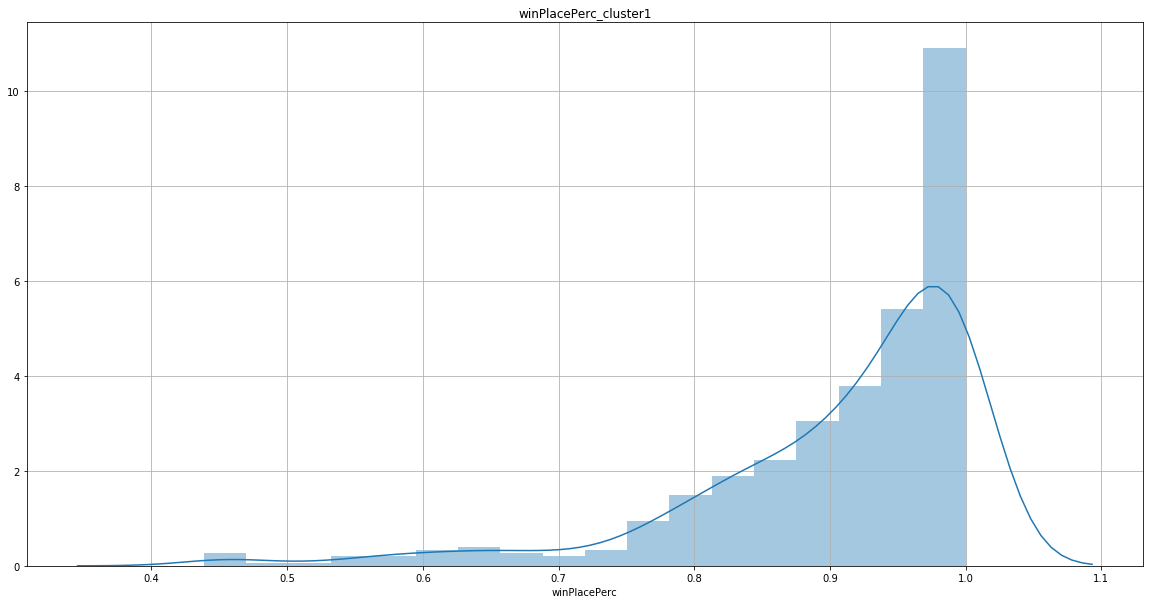

In [111]:
# outlier类的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(outlier[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

- 簇类1

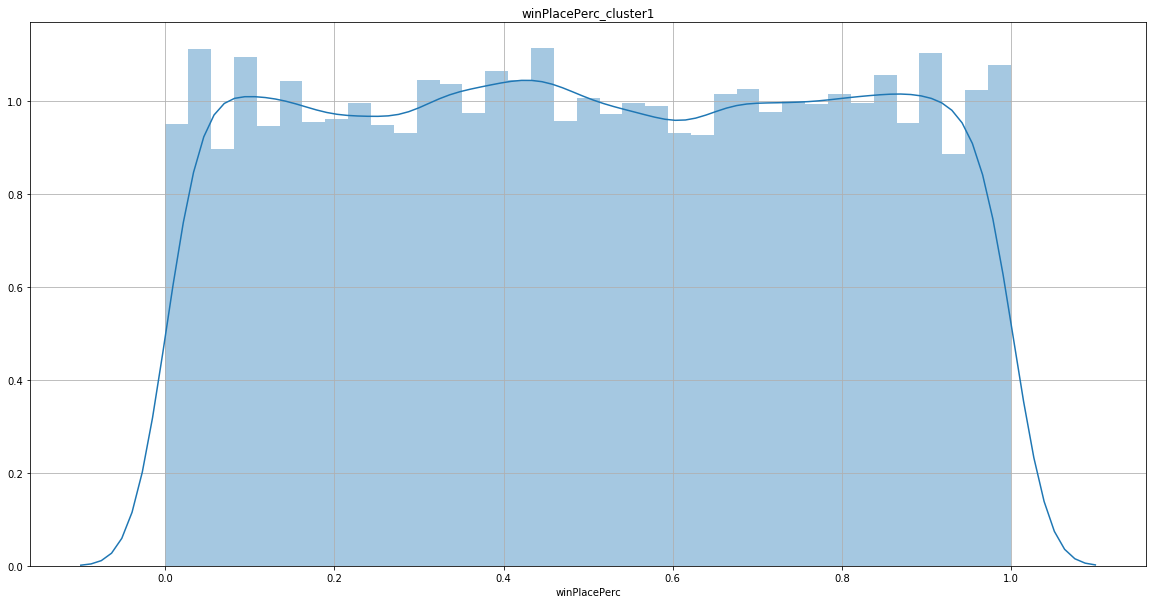

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
# 簇类1的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data1[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster1')
plt.grid()
plt.show()

- 簇类2

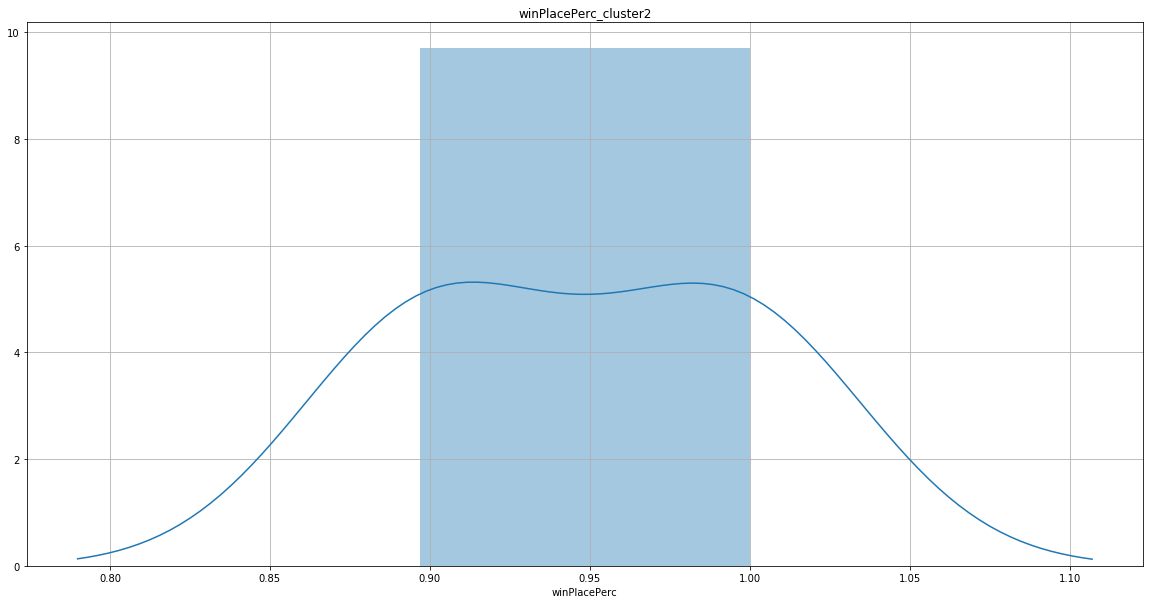

In [113]:
# 簇类2的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data2[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster2')
plt.grid()
plt.show()

- 簇类3

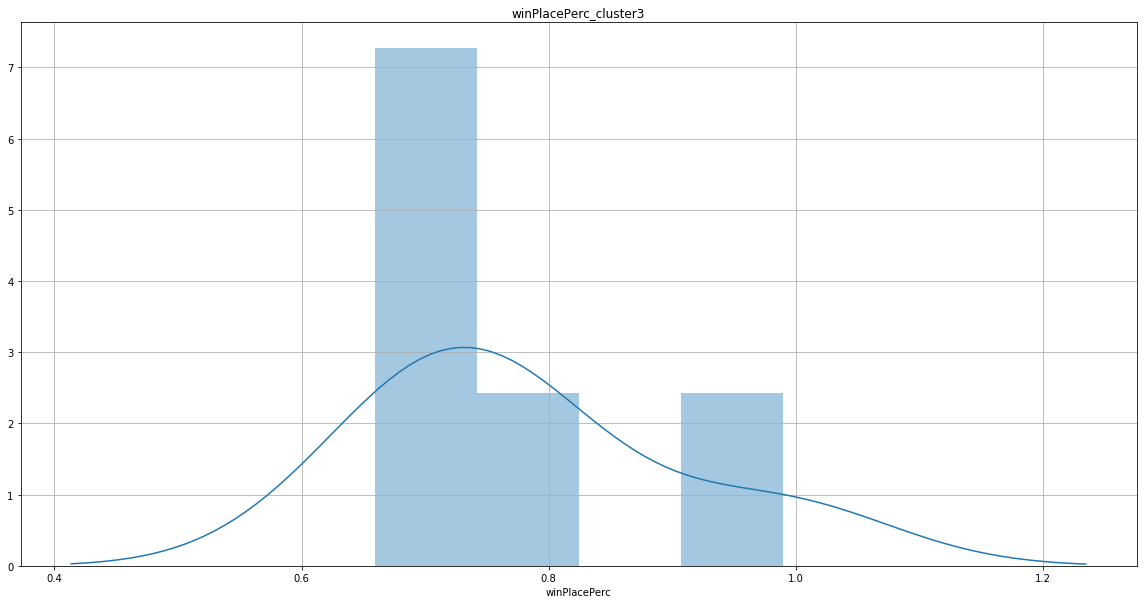

In [114]:
# 簇类3的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster3')
plt.grid()
plt.show()

- 簇类4

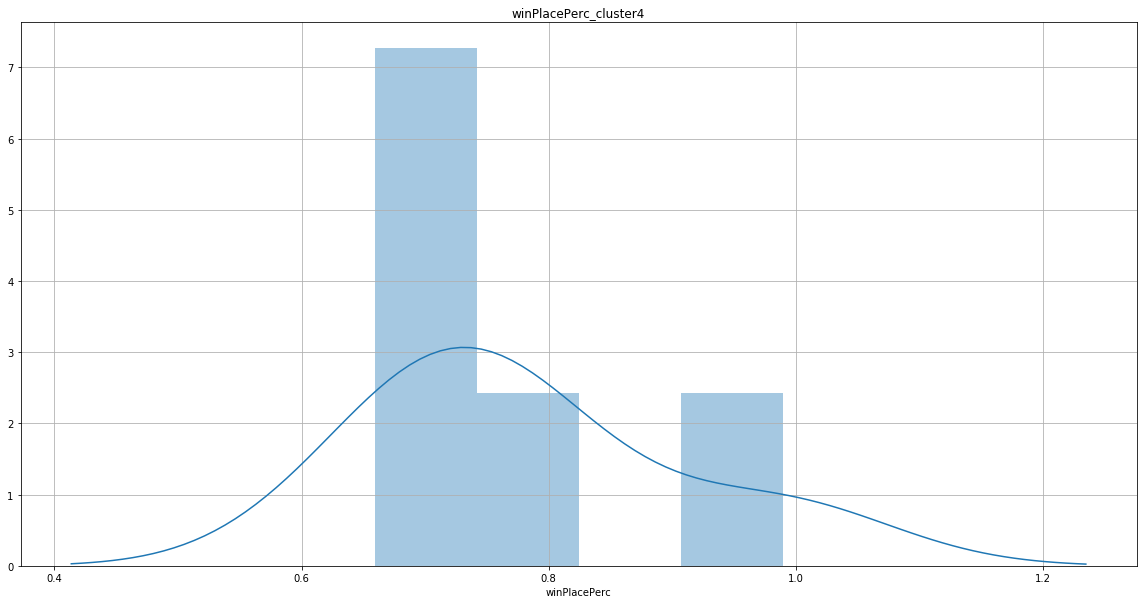

In [115]:
# 簇类4的获胜情况分布
plt.figure(figsize=(20,10))
sns.distplot(data3[1]['winPlacePerc'])
plt.title('winPlacePerc_cluster4')
plt.grid()
plt.show()

- 簇类5

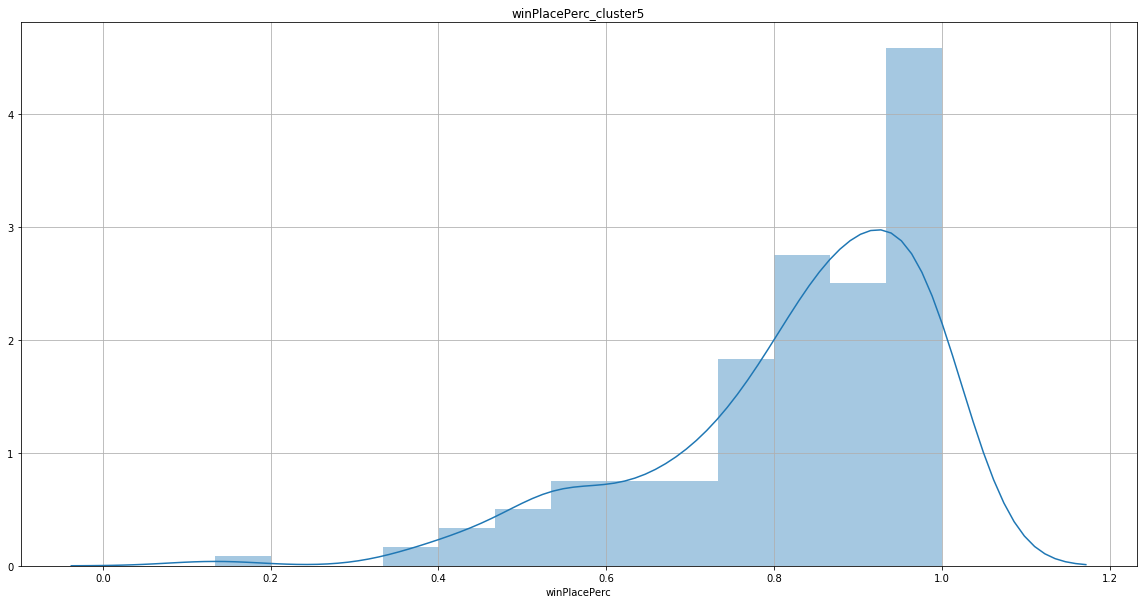

In [26]:
# # 簇类5的获胜情况分布
# plt.figure(figsize=(20,10))
# sns.distplot(data5[1]['winPlacePerc'])
# plt.title('winPlacePerc_cluster5')
# plt.grid()
# plt.show()

- 簇类6

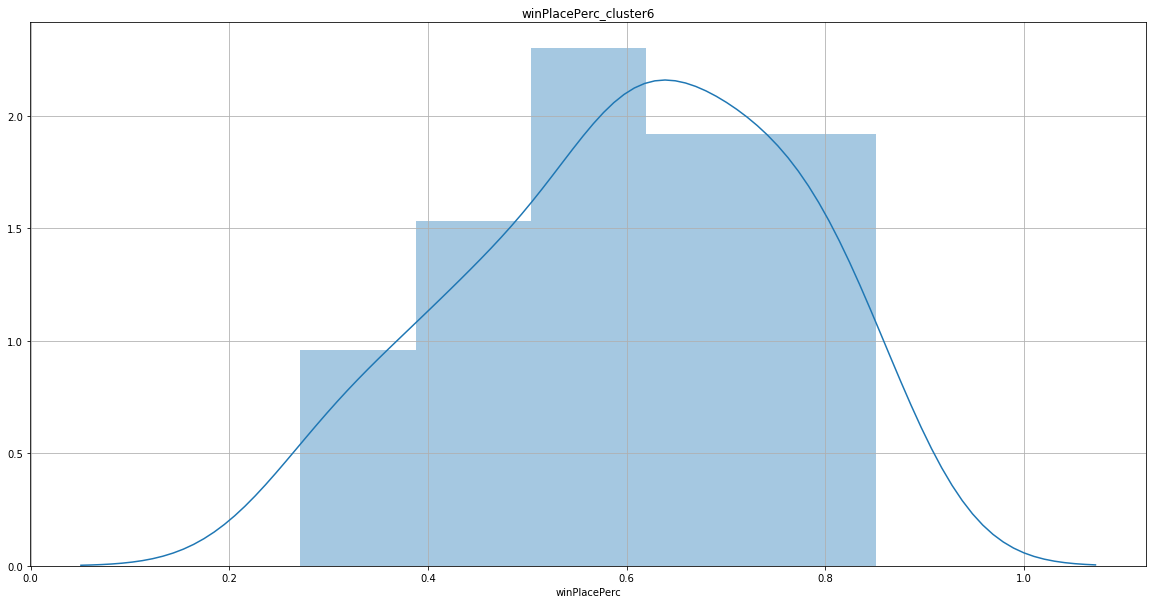

In [27]:
# # 簇类6的获胜情况分布
# plt.figure(figsize=(20,10))
# sns.distplot(data6[1]['winPlacePerc'])
# plt.title('winPlacePerc_cluster6')
# plt.grid()
# plt.show()

### 3.数据集处理

In [141]:
# 以8：2划分训练集和测试集
from sklearn.model_selection import train_test_split
train0,test0 = train_test_split(outlier[1],test_size=0.2,random_state=10)
train1,test1 = train_test_split(data1[1],test_size=0.2,random_state=10)
train2,test2 = train_test_split(data2[1],test_size=0.2,random_state=10)
train3,test3 = train_test_split(data3[1],test_size=0.2,random_state=10)
train4,test4 = train_test_split(data4[1],test_size=0.2,random_state=10)

In [142]:
train0_x = train0.drop(columns = ['winPlacePerc','dbscan'])
train0_y = train0['winPlacePerc']
train1_x = train1.drop(columns = ['winPlacePerc','dbscan'])
train1_y = train1['winPlacePerc']
train2_x = train2.drop(columns = ['winPlacePerc','dbscan'])
train2_y = train2['winPlacePerc']
train3_x = train3.drop(columns = ['winPlacePerc','dbscan'])
train3_y = train3['winPlacePerc']
train4_x = train4.drop(columns = ['winPlacePerc','dbscan'])
train4_y = train4['winPlacePerc']

test0_x = test0.drop(columns = ['winPlacePerc','dbscan'])
test0_y = test0['winPlacePerc']
test1_x = test1.drop(columns = ['winPlacePerc','dbscan'])
test1_y = test1['winPlacePerc']
test2_x = test2.drop(columns = ['winPlacePerc','dbscan'])
test2_y = test2['winPlacePerc']
test3_x = test3.drop(columns = ['winPlacePerc','dbscan'])
test3_y = test3['winPlacePerc']
test4_x = test4.drop(columns = ['winPlacePerc','dbscan'])
test4_y = test4['winPlacePerc']

In [143]:
from sklearn.preprocessing import StandardScaler
#标准化
ss0 = StandardScaler()
ss0.fit(train0_x)
train0_x_ss = ss0.transform(train0_x)
test0_x_ss = ss0.transform(test0_x)

ss1 = StandardScaler()
ss1.fit(train1_x)
train1_x_ss = ss1.transform(train1_x)
test1_x_ss = ss1.transform(test1_x)

ss2 = StandardScaler()
ss2.fit(train2_x)
train2_x_ss = ss2.transform(train2_x)
test2_x_ss = ss2.transform(test2_x)

ss3 = StandardScaler()
ss3.fit(train3_x)
train3_x_ss = ss3.transform(train3_x)
test3_x_ss = ss3.transform(test3_x)

ss4 = StandardScaler()
ss4.fit(train4_x)
train4_x_ss = ss4.transform(train4_x)
test4_x_ss = ss4.transform(test4_x)

### 3.预测

In [144]:
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [119]:
gbr_reg0 = ensemble.GradientBoostingRegressor()
gbr_reg0.fit(train0_x_ss,train0_y)
y_pre0=gbr_reg0.predict(test0_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test0_y,y_pre0))
print('GBRT_R方：',r2_score(test0_y,y_pre0))
gbr_reg0.feature_importances_

gbr_reg_MAE 0.05412235253133869
GBRT_R方： 0.5206243086707106


array([0.15028551, 0.02290595, 0.3762875 , 0.02581143, 0.02479264,
       0.16064063, 0.09963051, 0.0446028 , 0.01256798, 0.03629511,
       0.0158206 , 0.03035934])

In [120]:
gbr_reg1 = ensemble.GradientBoostingRegressor()
gbr_reg1.fit(train1_x_ss,train1_y)
y_pre1=gbr_reg1.predict(test1_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test1_y,y_pre1))
print('GBRT_R方：',r2_score(test1_y,y_pre1))
gbr_reg1.feature_importances_

gbr_reg_MAE 0.05076980806292569
GBRT_R方： 0.9401363633339691


array([2.04251295e-02, 2.47781578e-05, 1.65687739e-01, 3.98745654e-03,
       1.47434026e-05, 7.55627771e-01, 1.24637117e-03, 4.57729797e-02,
       1.66892367e-04, 3.46861105e-03, 4.38007028e-04, 3.13952088e-03])

In [121]:
gbr_reg2 = ensemble.GradientBoostingRegressor()
gbr_reg2.fit(train2_x_ss,train2_y)
y_pre2=gbr_reg2.predict(test2_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test2_y,y_pre2))
print('GBRT_R方：',r2_score(test2_y,y_pre2))
gbr_reg2.feature_importances_

gbr_reg_MAE 0.08434250209528593
GBRT_R方： nan


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([2.73338481e-01, 3.36233960e-03, 1.04120190e-03, 1.69087808e-02,
       3.10117088e-01, 5.20600148e-02, 0.00000000e+00, 2.46019092e-01,
       3.81875310e-02, 5.11385284e-02, 1.54986621e-04, 7.67195573e-03])

In [122]:
gbr_reg3 = ensemble.GradientBoostingRegressor()
gbr_reg3.fit(train3_x_ss,train3_y)
y_pre3=gbr_reg3.predict(test3_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test3_y,y_pre3))
print('GBRT_R方：',r2_score(test3_y,y_pre3))
gbr_reg3.feature_importances_

gbr_reg_MAE 0.27134709104985655
GBRT_R方： nan


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([7.86252665e-04, 4.02420613e-04, 2.97456139e-01, 1.73941125e-01,
       2.36235107e-01, 1.33623672e-04, 0.00000000e+00, 4.05185137e-02,
       8.64096810e-02, 1.41226568e-02, 1.49968775e-01, 2.57057332e-05])

In [123]:
gbr_reg4 = ensemble.GradientBoostingRegressor()
gbr_reg4.fit(train4_x_ss,train4_y)
y_pre4=gbr_reg4.predict(test4_x_ss)

print('gbr_reg_MAE',mean_absolute_error(test4_y,y_pre4))
print('GBRT_R方：',r2_score(test4_y,y_pre4))
gbr_reg4.feature_importances_

gbr_reg_MAE 0.01041751590403639
GBRT_R方： nan


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([0.00000000e+00, 4.65154244e-02, 2.42587667e-02, 3.32789812e-02,
       2.40588229e-01, 2.49177788e-01, 5.82002088e-04, 4.66378229e-02,
       7.93692365e-21, 1.44424813e-01, 0.00000000e+00, 2.14536173e-01])